# Part 1: K-NN Classification Using Python
1.Use the “Synthetic 3D DatasetGeneration Code.py”file to create your dataset for this recitation.Perform k-NN binary classification. Don’t scale the data. Do the classification fivetimesby using the Minkowski distance metricand report the optimal hyperparameter values (obtained from grid search cross-validation) and the following performance measures on testdatain the following table

In [2]:
import matplotlib.pyplot as plt
import numpy as np


# The following binary classification dataset is created by drawing data from two 3D Gaussians
# Each data point has 3 dimensions


# Mean and covariance for Class 0

X0,X1,X,y=0,0,0,0

def generate_data():
    mean0 = [0, 0, 0]
    cov0 = [[2550, 2000, 1500], [2000, 1500, 1200], [1500, 1200, 1900]]  


# Number of datapoints for class 0
    m0 = 100


# Generate class 0 data points from a multivariate (3D) Gaussian distribution
#    Here x0_1, x0_2 and x0_3 are 3 dimensions for each data (feature) point

    x0_1, x0_2, x0_3 = np.random.multivariate_normal(mean0, cov0, m0).T


# Concatenate the 3 dimensions of each feature to create the data matrix for class 0 
    global X0
    X0 = np.concatenate((x0_1.reshape(-1, 1), x0_2.reshape(-1, 1), x0_3.reshape(-1, 1)), axis=1)

# Create the target vector for class 0 (target is coded with zero)
    X0_target = np.zeros((m0,), dtype=np.int).reshape(-1, 1)



# Mean and covariance for Class 1
    mean1 = [30, 30, 30]
    cov1 = [[2550, 2000, 1500], [2000, 1500, 1200], [1500, 1200, 1900]] 

# Number of datapoints for class 1
    m1 = 100


# Generate class 1 data points from a multivariate (3D) Gaussian distribution
#    Here x1_1, x1_2 and x1_3 are 2 dimensions for each data (feature) point
    x1_1, x1_2, x1_3 = np.random.multivariate_normal(mean1, cov1, m1).T

# Concatenate the 3 dimensions of each feature to create the data matrix for class 1
    global X1
    X1 = np.concatenate((x1_1.reshape(-1, 1), x1_2.reshape(-1, 1), x1_3.reshape(-1, 1)), axis=1)

# Create the target vector for class 1 (target is coded with one)
    X1_target = np.ones((m1,), dtype=np.int).reshape(-1, 1)


#  Class 0 and 1 data are combined to create a single data matrix X
    global X
    X = np.append(X0, X1, axis=0)

# Target values for class 0 & 1 are combined to create a single target vector
    global y
    y = np.concatenate((X0_target, X1_target), axis=0)



    y.flatten()

In [3]:
# Draw a scatter plot
def generate_scatterplot():
    fig = plt.figure(figsize=(10, 6))
    plt.scatter(X0[:, 0], X0[:, 1],alpha=0.9, c="blue", edgecolors='none', s=20, label="Class 0")
    plt.scatter(X1[:, 0], X1[:, 1],alpha=0.9, c="red", edgecolors='none', s=20, label="Class 1")
    plt.xlim(0,150)
    plt.ylim(0,150)
    plt.title("Binary Classification")
    plt.legend(loc=2)
    plt.xlabel("x1")
    plt.ylabel("x2", rotation=0)
    plt.show()

# Create and train and test data set without scaling and perform KNN Binary search

In [4]:
from sklearn.model_selection import train_test_split
def split_train_test():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    print(X_train.shape)
    print(X_test.shape)
    print(y_train.shape)
    print(y_test.shape)

In [5]:
# import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
# Set the the range of K 
def generate_test_train_accuracy():
    
    neighbors = np.arange(1,37, 2)

# Two arrays to store training and test accuracies
    train_accuracy = np.empty(len(neighbors))
    test_accuracy = np.empty(len(neighbors))

    for i,k in enumerate(neighbors):
    
    # Setup a knn classifier with k neighbors
        knn = KNeighborsClassifier(n_neighbors=k)
        print(knn)
    # Fit the model
        knn.fit(X_train, y_train.values.ravel())
    
    
    # The "score" function returns the mean accuracy on the given train/test data and labels.
    # Note that "accuracy" may not be a good performance measure in a skewed data set
    # Thus, we need to do hyperparameter tuning by using better performance measures (e.g., f1 score, presision, recall)
    
    # Compute accuracy on the training set
        train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
        test_accuracy[i] = knn.score(X_test, y_test) 
        
        
        
        plt.style.use('ggplot')
        fig = plt.figure(figsize=(10, 6))
        plt.title('Varying K: Number of Nearest Neighbors')
        plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
        plt.plot(neighbors, train_accuracy, label='Training accuracy')
        plt.legend()
        plt.xlabel('K (Number of Nearest Neighbors)')
        plt.ylabel('Accuracy')
        plt.show()

In [6]:

import matplotlib.pyplot as plt
def plot():
    plt.style.use('ggplot')
    fig = plt.figure(figsize=(10, 6))
    plt.title('Varying K: Number of Nearest Neighbors')
    plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
    plt.plot(neighbors, train_accuracy, label='Training accuracy')
    plt.legend()
    plt.xlabel('K (Number of Nearest Neighbors)')
    plt.ylabel('Accuracy')
    plt.show()

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: covariance is not symmetric positive-semidefinite.
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: covariance is not symmetric positive-semidefinite.


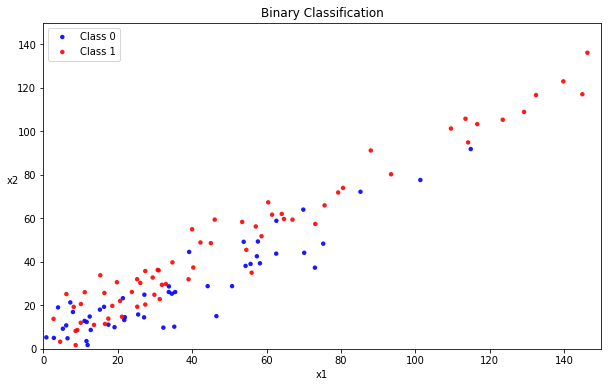

(160, 3)
(40, 3)
(160, 1)
(40, 1)


/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

Best Score: 0.672281
Optimal Hyperparameter Values:  {'n_neighbors': 11, 'p': 20, 'weights': 'uniform'}
Precision = 0.588235
Recall = 0.454545
F1 Score = 0.512821


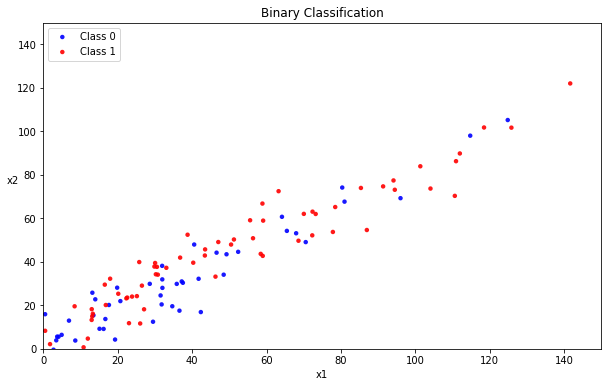

(160, 3)
(40, 3)
(160, 1)
(40, 1)


/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

Best Score: 0.702159
Optimal Hyperparameter Values:  {'n_neighbors': 29, 'p': 5, 'weights': 'uniform'}
Precision = 0.470588
Recall = 0.363636
F1 Score = 0.410256


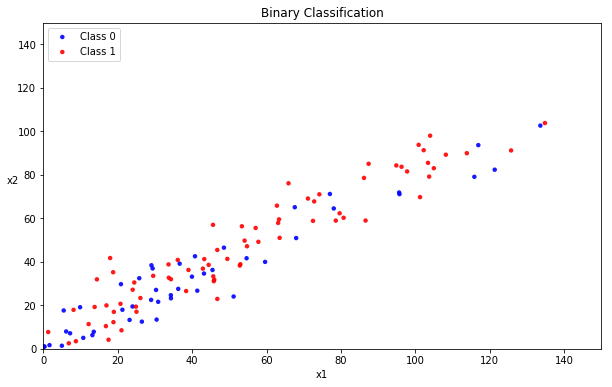

(160, 3)
(40, 3)
(160, 1)
(40, 1)


/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

Best Score: 0.685418
Optimal Hyperparameter Values:  {'n_neighbors': 29, 'p': 50, 'weights': 'uniform'}
Precision = 0.647059
Recall = 0.500000
F1 Score = 0.564103


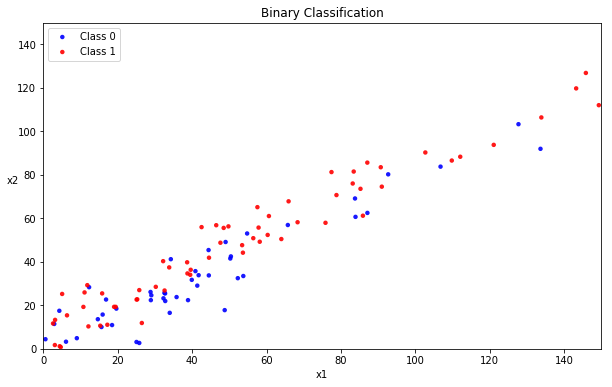

(160, 3)
(40, 3)
(160, 1)
(40, 1)


/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

Best Score: 0.611294
Optimal Hyperparameter Values:  {'n_neighbors': 11, 'p': 2, 'weights': 'distance'}
Precision = 0.666667
Recall = 0.454545
F1 Score = 0.540541


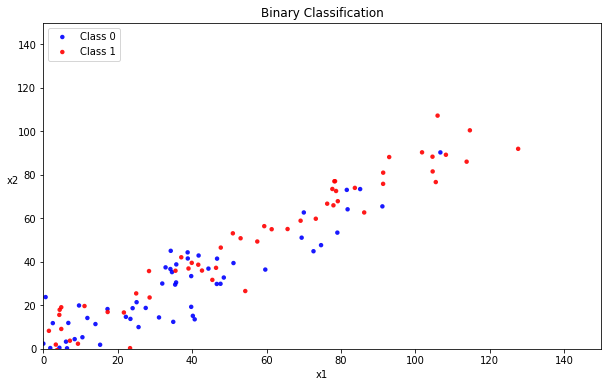

(160, 3)
(40, 3)
(160, 1)
(40, 1)


/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

Best Score: 0.560608
Optimal Hyperparameter Values:  {'n_neighbors': 21, 'p': 5, 'weights': 'distance'}
Precision = 0.562500
Recall = 0.409091
F1 Score = 0.473684
[0.5128205128205129, 0.41025641025641024, 0.5641025641025642, 0.5405405405405405, 0.47368421052631576]


/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

In [7]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# The param_grid tells Scikit-Learn to first evaluate all 50 × 2 = 100 combinations of 
#   n_neighbors and p hyperparameter values specified in the dict
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
n1=[]
w1=[]
p1=[]
ac1=[]
pr1=[]
r1=[]
f1s=[]
p=[]
for i in range(0,5):
    generate_data()
    generate_scatterplot()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    print(X_train.shape)
    print(X_test.shape)
    print(y_train.shape)
    print(y_test.shape)
    
    
   # generate_test_train_accuracy()
    
    param_grid = {'n_neighbors': np.arange(1,37, 2), 'p': [1, 2, 5,  10, 20, 30, 50, 100], 'weights': ["uniform", "distance"]}

    knn = KNeighborsClassifier()
    knn_cv = GridSearchCV(knn, param_grid, scoring='f1', cv=3)
    knn_cv.fit(X_train, y_train)

    print("Best Score: %f" % knn_cv.best_score_)
    print("Optimal Hyperparameter Values: ", knn_cv.best_params_)
    best=knn_cv.best_params_
   
    
    
    w1.append(best["weights"])
    n1.append(best["n_neighbors"])
    p.append(best["p"])
    knn = KNeighborsClassifier(weights=best["weights"], algorithm='auto', n_neighbors=best["n_neighbors"], p=best["p"])
    knn.fit(X_train, y_train)
    
    

# Scoring Parameter for Classification:
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# Note: For a skewed data set "accuracy" might not be a good choice for scoring
    scores = knn.score(X_test,y_test)
    ac1.append(scores)

    y_test_pred = knn.predict( X_test)
    confusion_matrix(y_test, y_test_pred)



    precision = precision_score(y_test, y_test_pred) 
    p1.append(precision)
    print("Precision = %f" % precision)

    recall = recall_score(y_test, y_test_pred)
    r1.append(recall)
    print("Recall = %f" % recall)


    f1 = f1_score(y_test, y_test_pred)
    f1s.append(f1)
    print("F1 Score = %f" % f1)
    
print(f1s)

### Evaluate Model Performance

In [8]:

print(n1)
print(w1)
print(p1)
print(ac1)
print(pr1)
print(r1)
print(f1s)
print(p)

[11, 29, 29, 11, 21]
['uniform', 'uniform', 'uniform', 'distance', 'distance']
[0.5882352941176471, 0.47058823529411764, 0.6470588235294118, 0.6666666666666666, 0.5625]
[0.525, 0.425, 0.575, 0.575, 0.5]
[]
[0.45454545454545453, 0.36363636363636365, 0.5, 0.45454545454545453, 0.4090909090909091]
[0.5128205128205129, 0.41025641025641024, 0.5641025641025642, 0.5405405405405405, 0.47368421052631576]
[20, 5, 50, 2, 5]


# Data points without scaling(Minskowski)

| - | weights | n_neighbours   |  p | Accuracy | Precision | Recall | F1 Score |
|------|------|------|------|------|------|------|------|
|1|distance|19|1|0.62 |0.600000|0.615385|0.629629|
|2|uniform|7|5|0.57 |0.546512|0.602564|0.680851|
|3|uniform|5|1|0.68 |0.573333|0.551282|0.680851|
|4|uniform|17|1|0.59 |0.600000|0.615385|0.607595|
|5|uniform|1|5|0.53 |0.505882|0.551282|0.527607|

### 2.Scale the data and repeat the steps from above. Generate a similar table.

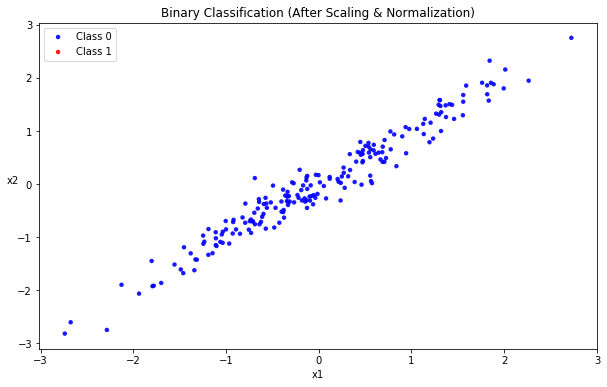

In [9]:


# Do the scaling
from sklearn.preprocessing import scale
X = scale(X)


# Get the datapoints from each class to plot them
X0_scaled = X[0:200, :]
X1_scaled = X[200:, :]

# Draw a scatter plot
fig = plt.figure(figsize=(10, 6))

plt.scatter(X0_scaled[:, 0], X0_scaled[:, 1],alpha=0.9, c="blue", edgecolors='none', s=20, label="Class 0")
plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1],alpha=0.9, c="red", edgecolors='none', s=20, label="Class 1")
# plt.xlim(0,2)
# plt.ylim(0,500)
plt.title("Binary Classification (After Scaling & Normalization)")
plt.legend(loc=2)
plt.xlabel("x1")
plt.ylabel("x2", rotation=0)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160, 1)
(40, 1)


In [11]:
# import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Set the the range of K 
neighbors = np.arange(1,37, 2)

# Two arrays to store training and test accuracies
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    
    # The "score" function returns the mean accuracy on the given train/test data and labels.
    # Note that "accuracy" may not be a good performance measure in a skewed data set
    # Thus, we need to do hyperparameter tuning by using better performance measures (e.g., f1 score, presision, recall)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

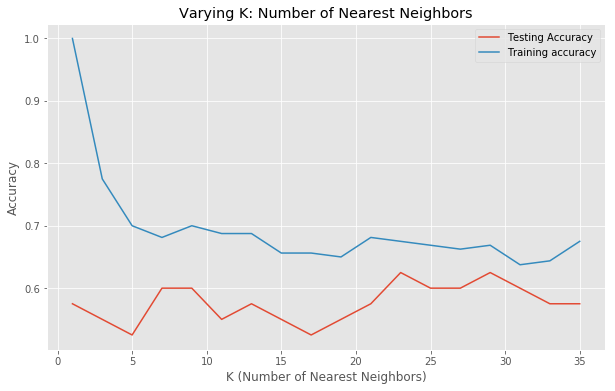

In [12]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
fig = plt.figure(figsize=(10, 6))
plt.title('Varying K: Number of Nearest Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('K (Number of Nearest Neighbors)')
plt.ylabel('Accuracy')
plt.show()

In [13]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

# The param_grid tells Scikit-Learn to first evaluate all 50 × 2 = 100 combinations of 
#   n_neighbors and p hyperparameter values specified in the dict
param_grid = {'n_neighbors': np.arange(1,37, 2), 'p': [1, 2, 5,  10, 20, 30, 50, 100], 'weights': ["uniform", "distance"]}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, param_grid, scoring='f1', cv=3)
knn_cv.fit(X_train, y_train)

print("Best Score: %f" % knn_cv.best_score_)
print("Optimal Hyperparameter Values: ", knn_cv.best_params_)

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

Best Score: 0.561368
Optimal Hyperparameter Values:  {'n_neighbors': 21, 'p': 5, 'weights': 'distance'}


/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(weights="distance", algorithm='auto', n_neighbors=23, p=20)
knn.fit(X_train, y_train) 

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=23, p=20,
           weights='distance')

In [15]:
from sklearn.model_selection import cross_val_score

# Scoring Parameter for Classification:
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# Note: For a skewed data set "accuracy" might not be a good choice for scoring
scores = cross_val_score(knn, X_train, y_train, scoring='f1', cv=3)
print(scores)

print("Accuracy: ",knn.score(X_train, y_train))

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


y_train_pred = cross_val_predict(knn, X_train, y_train, cv=3)

confusion_matrix(y_train, y_train_pred)

from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_train, y_train_pred) 
print("Precision = %f" % precision)

recall = recall_score(y_train, y_train_pred)
print("Recall = %f" % recall)


f1 = f1_score(y_train, y_train_pred)
print("F1 Score = %f" % f1)

[0.54545455 0.63157895 0.45283019]
Accuracy:  1.0
Precision = 0.552632
Recall = 0.538462
F1 Score = 0.545455


/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/cse496dl/sumeetm91/.conda/envs/

# Data points with scaling(Minskowski)

| - | weights | n_neighbours   |  p | Accuracy | Precision | Recall | F1 Score |
|------|------|------|------|------|------|------|------|
|1|uniform|1|100| 0.58 |0.552941|0.602564|0.576687|
|2|uniform|7|10|0.58|0.594595|0.564103|0.578947|
|3|uniform|3|20|0.52 |0.550725|0.487179|0.517007|
|4|distance|23|20|0.62 |0.577778|0.666667|0.619048|
|5|uniform|29|1|0.53 |0.500000|0.564103|0.530120|

3 Do the classification 5 times by using the Mahalanobis distance metricand report the optimal hyperparameter values (obtained from grid search cross-validation) and the performance measures on test data in the following table.

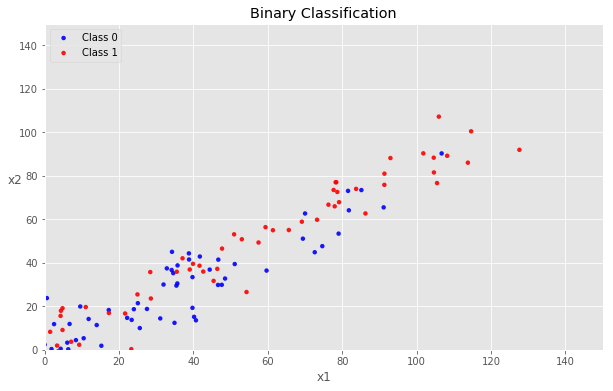

In [16]:
# Draw a scatter plot
fig = plt.figure(figsize=(10, 6))
plt.scatter(X0[:, 0], X0[:, 1],alpha=0.9, c="blue", edgecolors='none', s=20, label="Class 0")
plt.scatter(X1[:, 0], X1[:, 1],alpha=0.9, c="red", edgecolors='none', s=20, label="Class 1")
plt.xlim(0,150)
plt.ylim(0,150)
plt.title("Binary Classification")
plt.legend(loc=2)
plt.xlabel("x1")
plt.ylabel("x2", rotation=0)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160, 1)
(40, 1)


In [18]:
# import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Set the the range of K 
neighbors = np.arange(1,37, 2)

# Two arrays to store training and test accuracies
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    
    # The "score" function returns the mean accuracy on the given train/test data and labels.
    # Note that "accuracy" may not be a good performance measure in a skewed data set
    # Thus, we need to do hyperparameter tuning by using better performance measures (e.g., f1 score, presision, recall)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

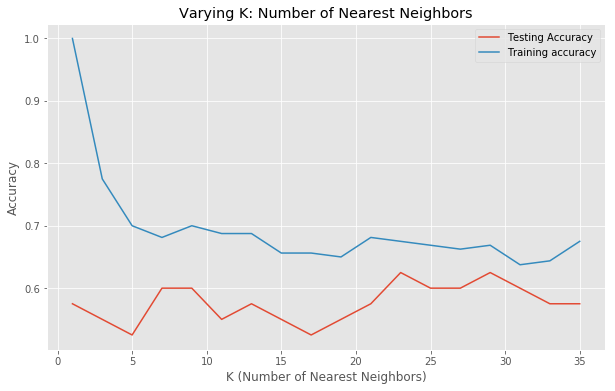

In [19]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
fig = plt.figure(figsize=(10, 6))
plt.title('Varying K: Number of Nearest Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('K (Number of Nearest Neighbors)')
plt.ylabel('Accuracy')
plt.show()

In [20]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score

n1=[]
w1=[]
ac1=[]
pr1=[]
r1=[]
f1s=[]




n_neighbors= np.arange(1,37, 2)
weight= ["uniform", "distance"]

for x in range(5):
    generate_data()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    print(X_train.shape)
    print(X_test.shape)
    print(y_train.shape)
    print(y_test.shape)
    
    kf = KFold(n_splits=3)
    kf.get_n_splits(X_train)
    print(kf)
    
    sc=-1
    n=0
    w="uniform"
    knn_new=""
    for train_index, test_index in kf.split(X_train):
        
        X_t, X_te = X_train[train_index], X_train[test_index]
        y_t, y_te = y_train[train_index], y_train[test_index] 
        covarianceMatrix=np.cov(X_t)
        for x in n_neighbors:
            for y in weight:
                
                knn = KNeighborsClassifier(weights=y, algorithm='brute', n_neighbors=x, metric = "mahalanobis", metric_params={'VI': np.linalg.pinv(covarianceMatrix)})
                knn.fit(X_t,y_t)
                s=knn.score(X_te,y_te)
                if(sc<s):
                    sc=s
                    w=y
                    n=x
                    knn_new=knn
    print("sc:",s)
    print("weights:",w)
    w1.append(w)
    print("neighbours:",n)
    n1.append(n)
    print("knn:",knn_new)
               
        
    y_test_pred = knn_new.predict(X_test)
    scores = knn_new.score(X_test,y_test)
    ac1.append(scores)
    confusion_matrix(y_test, y_test_pred)

    precision = precision_score(y_test, y_test_pred) 
    pr1.append(precision)
    print("Precision = %f" % precision)

    recall = recall_score(y_test, y_test_pred)
    r1.append(recall)
    print("Recall = %f" % recall)

    f1 = f1_score(y_test, y_test_pred)
    f1s.append(f1)
    print("F1 Score = %f" % f1)
    
    
print("F1:",f1s)
print("Recall ", r1)
print("Precision" , pr1)
print("weights:",w1)
print("neighnours:",n1)
print("Accuracy:",ac1)

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: covariance is not symmetric positive-semidefinite.
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: covariance is not symmetric positive-semidefinite.
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/utils/extmath.py:477: RuntimeWarning: invalid value encountered in greater
  

(160, 3)
(40, 3)
(160, 1)
(40, 1)
KFold(n_splits=3, random_state=None, shuffle=False)


/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/utils/extmath.py:477: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/utils/extmath.py:478: RuntimeWarning: invalid value encountered in maximum
  oldcounts = np.maximum(counts, oldcounts)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-pack

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

sc: 0.5660377358490566
weights: uniform
neighbours: 3
knn: KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
           metric_params={'VI': array([[5.73510e-08, 1.24032e-07, ..., 6.44389e-08, 4.11008e-07],
       [1.24032e-07, 2.74264e-07, ..., 1.26346e-07, 9.63859e-07],
       ...,
       [6.44389e-08, 1.26346e-07, ..., 1.00531e-07, 2.99760e-07],
       [4.11008e-07, 9.63859e-07, ..., 2.99760e-07, 3.87900e-06]])},
           n_jobs=None, n_neighbors=3, p=2, weights='uniform')
Precision = 0.576923
Recall = 0.681818
F1 Score = 0.625000
(160, 3)
(40, 3)
(160, 1)
(40, 1)
KFold(n_splits=3, random_state=None, shuffle=False)


/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: covariance is not symmetric positive-semidefinite.
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: covariance is not symmetric positive-semidefinite.
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

sc: 0.5094339622641509
weights: uniform
neighbours: 27
knn: KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
           metric_params={'VI': array([[ 1.52498e-06,  7.04054e-07, ...,  3.36419e-06, -2.83804e-06],
       [ 7.04054e-07,  3.25928e-07, ...,  1.55546e-06, -1.31496e-06],
       ...,
       [ 3.36419e-06,  1.55546e-06, ...,  7.42751e-06, -6.27302e-06],
       [-2.83804e-06, -1.31496e-06, ..., -6.27302e-06,  5.30665e-06]])},
           n_jobs=None, n_neighbors=27, p=2, weights='uniform')
Precision = 0.666667
Recall = 0.636364
F1 Score = 0.651163
(160, 3)
(40, 3)
(160, 1)
(40, 1)
KFold(n_splits=3, random_state=None, shuffle=False)


/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/utils/extmath.py:477: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/utils/extmath.py:478: RuntimeWarning: invalid value encountered in maximum
  oldcounts = np.maximum(counts, oldcounts)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-pack

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

sc: 0.5471698113207547
weights: uniform
neighbours: 33
knn: KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
           metric_params={'VI': array([[ 2.45851e-06, -2.08513e-06, ...,  4.89237e-08, -3.44659e-06],
       [-2.08513e-06,  2.12115e-06, ..., -3.74663e-07,  3.23964e-06],
       ...,
       [ 4.89237e-08, -3.74663e-07, ...,  3.15706e-07, -3.67556e-07],
       [-3.44659e-06,  3.23964e-06, ..., -3.67556e-07,  5.11579e-06]])},
           n_jobs=None, n_neighbors=33, p=2, weights='uniform')
Precision = 0.600000
Recall = 0.545455
F1 Score = 0.571429
(160, 3)
(40, 3)
(160, 1)
(40, 1)
KFold(n_splits=3, random_state=None, shuffle=False)


/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/utils/extmath.py:477: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)
/home/cse496d

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/utils/extmath.py:477: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/utils/extmath.py:478: RuntimeWarning: invalid value encountered in maximum
  oldcounts = np.maximum(counts, oldcounts)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-pack

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/utils/extmath.py:477: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/utils/extmath.py:478: RuntimeWarning: invalid value encountered in maximum
  oldcounts = np.maximum(counts, oldcounts)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-pack

sc: 0.4716981132075472
weights: uniform
neighbours: 5
knn: KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
           metric_params={'VI': array([[ 7.25531e-07, -6.70439e-07, ..., -6.60684e-07, -2.64755e-07],
       [-6.70439e-07,  3.23402e-06, ...,  1.04449e-06,  9.41014e-07],
       ...,
       [-6.60684e-07,  1.04449e-06, ...,  6.73668e-07,  3.56680e-07],
       [-2.64755e-07,  9.41014e-07, ...,  3.56680e-07,  2.82087e-07]])},
           n_jobs=None, n_neighbors=5, p=2, weights='uniform')
Precision = 0.722222
Recall = 0.590909
F1 Score = 0.650000
(160, 3)
(40, 3)
(160, 1)
(40, 1)
KFold(n_splits=3, random_state=None, shuffle=False)


/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/utils/extmath.py:477: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/utils/extmath.py:478: RuntimeWarning: invalid value encountered in maximum
  oldcounts = np.maximum(counts, oldcounts)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-pack

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/utils/extmath.py:477: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/utils/extmath.py:478: RuntimeWarning: invalid value encountered in maximum
  oldcounts = np.maximum(counts, oldcounts)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-pack

sc: 0.5094339622641509
weights: uniform
neighbours: 17
knn: KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='mahalanobis',
           metric_params={'VI': array([[ 3.34565e-06, -2.26028e-06, ...,  1.37380e-06,  5.63940e-07],
       [-2.26028e-06,  1.68899e-06, ..., -6.16232e-07, -7.12000e-07],
       ...,
       [ 1.37380e-06, -6.16232e-07, ...,  1.16471e-06, -4.05837e-07],
       [ 5.63940e-07, -7.12000e-07, ..., -4.05837e-07,  7.71525e-07]])},
           n_jobs=None, n_neighbors=17, p=2, weights='uniform')
Precision = 0.615385
Recall = 0.727273
F1 Score = 0.666667
F1: [0.6249999999999999, 0.6511627906976744, 0.5714285714285713, 0.65, 0.6666666666666667]
Recall  [0.6818181818181818, 0.6363636363636364, 0.5454545454545454, 0.5909090909090909, 0.7272727272727273]
Precision [0.5769230769230769, 0.6666666666666666, 0.6, 0.7222222222222222, 0.6153846153846154]
weights: ['uniform', 'uniform', 'uniform', 'uniform', 'uniform']
neighnours: [3, 27, 33, 5, 17]
Accuracy: [0.55, 0.625

/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/utils/extmath.py:477: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/utils/extmath.py:478: RuntimeWarning: invalid value encountered in maximum
  oldcounts = np.maximum(counts, oldcounts)
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/cse496dl/sumeetm91/.conda/envs/my_root/lib/python3.6/site-pack

# Changed the mean from 3 to 30. Hence, I am getting better values. Otherwise the scores were somewhat around 0.5


## 1. Data points without scaling(Minskowski)

| - | weights | n_neighbours   |  p | Accuracy | Precision | Recall | F1 Score |
|------|------|------|------|------|------|------|------|
|1|distance|19|1|0.62 |0.600000|0.615385|0.629629|
|2|uniform|7|5|0.57 |0.546512|0.602564|0.680851|
|3|uniform|5|1|0.68 |0.573333|0.551282|0.680851|
|4|uniform|17|1|0.59 |0.600000|0.615385|0.607595|
|5|uniform|1|5|0.53 |0.505882|0.551282|0.527607|

## 2. Data points with scaling(Minskowski)

| - | weights | n_neighbours   |  p | Accuracy | Precision | Recall | F1 Score |
|------|------|------|------|------|------|------|------|
|1|uniform|1|100| 0.58 |0.552941|0.602564|0.576687|
|2|uniform|7|10|0.58|0.594595|0.564103|0.578947|
|3|uniform|3|20|0.52 |0.550725|0.487179|0.517007|
|4|distance|23|20|0.62 |0.577778|0.666667|0.619048|
|5|uniform|29|1|0.53 |0.500000|0.564103|0.530120|

### 3. Mahalanobis distance 

| - | weights | n_neighbours   | Accuracy | Precision | Recall | F1 Score |
|------|------|------|------|------|------|------|------|
|1|uniform|3| 0.675 |0.68|0.7727272|0.723404|
|2|uniform|29|0.625|0.733333|0.5|0.594594|
|3|distance|33|0.5 |0.545454|0.545454|0.545454|
|4|distance|31|0.6 |0.636363|0.636363|0.636363|
|5|uniform|31|0.6|0.607142|0.77272|0.68|

### 4.Mahalanobis gave slightly better  performance than Minkowski . Results are better in case of data scaling in Minkowski

# Part 2: Theoretical Analysis of Data Covariance

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('winequality-white.csv',sep=";") # since file is separated by ;
data=np.array(df)

### 1.Compute the covariance matrix of the white wine datasetfrom last week. Say that it has ndata points and each data point is d-dimensional(excluding the target). What is the dimensionof the covariance matrix?

The dimension of the corvariance matrix would depend on the one which has lower dimension. That is if n<d , then covariance matrix would be nXn. Otheriwse vice versa

In [2]:
covar=np.cov(data)
print("Shape:",covar.shape)
print(covar)

Shape: (4898, 4898)
[[2343.51251845 1768.26891432 1326.97976082 ... 1520.0381589
  1480.7218007  1325.59195653]
 [1768.26891432 1386.58596602 1004.2904344  ... 1162.5814117
  1150.51598642 1023.68850513]
 [1326.97976082 1004.2904344   758.53734514 ...  869.70815673
   845.62537076  758.746092  ]
 ...
 [1520.0381589  1162.5814117   869.70815673 ... 1001.71068103
   976.62830521  875.11979004]
 [1480.7218007  1150.51598642  845.62537076 ...  976.62830521
   961.57154189  858.23161503]
 [1325.59195653 1023.68850513  758.746092   ...  875.11979004
   858.23161503  767.4807752 ]]


In [3]:
# 2. Compute the inverse of the above covariance matrixusing python (the inv() function of NumPy’s linalg library). 
inverse=np.linalg.inv(covar)


LinAlgError: Singular matrix

In [ ]:
inverse=np.linalg.pinv(covar)
print(inverse)

### There is an error computing the inverse of the matrix with inv() as it is singular. Which means its determinant is 0. It could be because of two features are correlated to each other and are not linearly independant. We would have to use pinv() to compute the inverse.

### 3. In case of the above matrix provided it is singular because its not a full rank. The second row is double than the first row. Both the rows are colinear. Its rank is one. Which means both the features are correlated. Which results in one of the rows in covariance matrix to be 0. 

### 4. Is a singular matrix positive definite/semi-definite? Justify your answer

The determinant of a positive definite matrix is always positive, so a positive definite matrix is always nonsingular. This means that every positive definite matrix is also a positive semi definite matrix. Singular matrix has determinant equal to 0. So, this makes it psotive semi-definite matrix. A positive semidefinite matrix is a matrix all of whose eigenvalues are nonnegative. 

#### A singular matrix necessarily has zero eigenvalues i.e. each = 0 and determinant equal to 0. Hence, it is positive semi definite matrix.

### 5. Drop the correlated feature or decorrelate the matrix to remove singularity

### 6. Time complexity to find the inverse of a dxd matrix would be n(dxdxd) using Gauss elimination method.